# Prediction of Prices

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.metrics import MeanSquaredError
from tensorflow.keras.models import Sequential
import tensorflow as tf

import os

In [ ]:
# !git clone https://github.com/PriyangshuMazumder/tdlproj.git
# !ls
# %cd tdlproj
# !rm -r .git
# %cd ..

In [ ]:
for dirname, _, filenames in os.walk('/content/tdlproj'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/tdlproj/coin_EOS.csv
/content/tdlproj/coin_Polkadot.csv
/content/tdlproj/coin_USDCoin.csv
/content/tdlproj/coin_Bitcoin.csv
/content/tdlproj/coin_Litecoin.csv
/content/tdlproj/coin_Cosmos.csv
/content/tdlproj/coin_Iota.csv
/content/tdlproj/coin_Uniswap.csv
/content/tdlproj/coin_XRP.csv
/content/tdlproj/coin_Dogecoin.csv
/content/tdlproj/coin_ChainLink.csv
/content/tdlproj/coin_Stellar.csv
/content/tdlproj/coin_WrappedBitcoin.csv
/content/tdlproj/coin_Aave.csv
/content/tdlproj/coin_NEM.csv
/content/tdlproj/coin_Tron.csv
/content/tdlproj/coin_Cardano.csv
/content/tdlproj/coin_BinanceCoin.csv
/content/tdlproj/coin_CryptocomCoin.csv
/content/tdlproj/coin_Tether.csv
/content/tdlproj/coin_Solana.csv
/content/tdlproj/coin_Monero.csv
/content/tdlproj/coin_Ethereum.csv


In [ ]:
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999 #Outputs more colums for dataframes

base = "/content/tdlproj"
datahistory = 60 #Amount of days for data history to use

def coincount(data_drt):
    #This counts the amount of coin files within the given directory.
    coin__Count = 0
    for cryptofile in os.listdir(data_drt):
        if cryptofile.endswith(".csv"):  #It makes sure that only the csv files are being counted.
            coin__Count += 1
    return coin__Count

In [ ]:
def get_max_min_data_lengths(data_drt):
    #It finds min and max lengths of the data coin files.
    lengthmax = 0
    lengthmin = float("inf")  #Actiavtes lengthmin to be infinity
    for cryptofile in os.listdir(data_drt):
        if cryptofile.endswith(".csv"):
            fD = pd.read_csv(data_drt + "/" + cryptofile, parse_dates=['Date'])
            lengthdata = fD.shape[0]
            lengthmax = max(lengthmax, lengthdata)
            lengthmin = min(lengthmin, lengthdata)
    return lengthmax,lengthmin


In [ ]:
def read_process_coin_data(data_drt, indexCoin):
    #It reads and processes a specific coin.
    cryptofile = os.listdir(data_drt)[indexCoin]
    fD = pd.read_csv(data_drt + "/" + cryptofile, parse_dates=['Date'])
    symbolCoin = cryptofile[5:-4]
    lengthdata = fD.shape[0]
    pricesclosing = fD['closed'].values
    return symbolCoin, lengthdata, pricesclosing

In [ ]:
def read_data(data_drt, datahistory):
    #It reads and processes the cryptocurrency data.
    coinNum = coin__Count(data_drt)
    maxlengthdata = get_max_min_data_lengths(data_drt)  #length_min Discarded.
    pricesclosingdata = np.zeros((coinNum, maxlengthdata))
    coinlengthsdata = np.zeros(coinNum, dtype=int)


    for indexCoin in range(coinNum):
        symbolCoin, lengthdata, pricesclosing = read_process_coin_data(data_drt, indexCoin)
        print(indexCoin, symbolCoin, lengthdata)
        priceslosingdata[indexCoin, 0:lengthdata] = pricesclosing
        coinlengthsdata[indexCoin] = lengthdata

In [ ]:
def read_data ():
#Reading and processing all coin's data in the exact directory.

    coinNum = 0
    for name in os.listdir(base):
        coinNum += 1 #This counts the amount of files with coins.

    lengthmax, lengthmin = 0, 1000000 #Intiating along a big value.
    for name in os.listdir(base):
        fD = pd.read_csv(base + "/" + name, parse_dates=['Date'])
        thelength = fD.shape[0]
        if lengthmax < thelength:
            lengthmax = thelength
        if lengthmin > thelength:
            lengthmin = thelength #Won't really be used but stored for some reference.

    #Activates arrays to keep coins data
    info = np.zeros ((coinNum, lengthmax))
    Slength = np.zeros(coinNum, dtype = int)
    i = 0
    for name in os.listdir(base):
        coinSymb = name[5:-4] #Extracting the symbol of the coin from the file name.
        fD = pd.read_csv(base + "/" + name, parse_dates=['Date'])
        print(fD.head())
        thelength = fD.shape[0]

        #Storing coin info.
        Slength[i] = thelength
        print (i, coinSymb, thelength)

        info[i, 0:thelength] = fD['Close'].values
        i += 1


    return coinNum, Slength, info

In [ ]:
coinNum, Slength, info = read_data ()
print ("Coin amount: ", coinNum, ".")

0 EOS 1466
1 Polkadot 320
2 USDCoin 1002
3 Bitcoin 2991
4 Litecoin 2991
5 Cosmos 845
6 Iota 1484
7 Uniswap 292
8 XRP 2893
9 Dogecoin 2760
10 ChainLink 1385
11 Stellar 2527
12 WrappedBitcoin 888
13 Aave 275
14 NEM 2288
15 Tron 1392
16 Cardano 1374
17 BinanceCoin 1442
18 CryptocomCoin 935
19 Tether 2318
20 Solana 452
21 Monero 2602
22 Ethereum 2160
Coin amount:  23 .


In [ ]:
info.shape

(23, 2991)

In [ ]:
def data_scale(info, Slength):

    coinNum = info.shape[0] #More cleaner name for the variable.
    shift_info = np.zeros(coinNum)
    factor_scale = np.zeros(coinNum)
    #^^^ shift_info and factor_scale have descriptive name.

    for i in range (coinNum):
        valMax = info[i,:Slength[i]].max()
        valMin = info[i, :Slength[i]].min()
        #^^^ Clearing calculation ^^^
        shift_info[i] = valMin #This stores the info of shift value of the info.
        factor_scale[i] = valMax - valMin #Calculating the factor scale.

        if factor_scale[i] == 0:
            raise ValueError("Division by zero encountered during scaling.")

        info[i,0:Slength[i]] = (info[i,0:Slength[i]]-shift_info[i])/factor_scale[i]
    return (shift_info, factor_scale) #Scaling the info and scale factor

shift_info, factor_scale = data_scale (info, Slength)
shift_info, factor_scale

(array([4.93225008e-01, 2.87502827e+00, 9.70123944e-01, 6.84309998e+01,
        1.15700996e+00, 1.64920313e+00, 1.10194662e-01, 1.93011859e+00,
        2.81020999e-03, 8.72652017e-05, 1.31128997e-01, 1.35659997e-03,
        3.39597862e+03, 2.77150844e+01, 8.57151026e-05, 1.42682996e-03,
        1.85391009e-02, 9.98668000e-02, 1.21327179e-02, 6.06229007e-01,
        5.15272785e-01, 2.23521993e-01, 4.34828997e-01]),
 array([2.10493756e+01, 4.50709118e+01, 7.39052133e-02, 6.34350269e+04,
        3.85293769e+02, 2.77859465e+01, 5.25613548e+00, 4.12343876e+01,
        3.37499979e+00, 6.84689715e-01, 5.20675676e+01, 8.94870402e-01,
        6.00406012e+04, 6.04551403e+02, 1.84263432e+00, 2.19128163e-01,
        2.29057348e+00, 6.75584211e+02, 2.34715552e-01, 5.99510968e-01,
        5.53956875e+01, 4.83360090e+02, 4.16826622e+03]))

In [ ]:
def sequence (info, Slength, begin, finish):

    assert len(info) == len(Slength), "Unmatched data length."

    #Intiate blank lists to keep targets and sequences.
    A = []
    B = []

    #It only crosses over the exact coins.
    for j in range (begin, finish):
        for i in range(datahistory, Slength[j]):
            #Append input sequence and its compatible value target.
            A.append(info[j, i-datahistory:i])
            B.append(info[j, i])

    #Numpy arrays returned to LSTM with proper shapes.
    return np.array(A)[:, :, np.newaxis], np.array(B)


#Creating the validation, training, and test sequence.
X_val, Y_val = sequence(info, Slength, 18, 22)
print ("Approximately", Y_val.shape[0], "Sequence for validation.")


X_test, Y_test = sequence(info, Slength, 22, 23)
print ("Approximately", Y_test.shape[0], "Sequence for testing.")


X_train, Y_train = sequence(info, Slength, 0, 18)
print ("Approximately", Y_train.shape[0], "Sequence for training.")

Approximately 6067 Sequence for validation.
Approximately 2100 Sequence for testing.
Approximately 27535 Sequence for training.


In [ ]:
def lstm_model ():

    model_lstm = tf.keras.Sequential()

    #The beginning of this model with the first LSTM layer, with 130 units, giving back the sequences for a bigger model.
    model_lstm.add(tf.keras.layers.LSTM(130, return_sequences=True, input_shape= (datahistory, 1)))

    #Here is the second LSTM layer coming in with 70 units, however not giving or returning the sequences.
    model_lstm.add(tf.keras.layers.LSTM(70, return_sequences=False))

    #A layer dense made with 30 units for medial processing.
    model_lstm.add(tf.keras.layers.Dense(30))

    #Another dense layer with is the output layer with only 1 unit for prediction.
    model_lstm.add(tf.keras.layers.Dense(1))

    #For compiling the model and utilizing the adam optimizer, and mean squared error loss.
    model_lstm.compile(optimizer='adam', loss='mean_squared_error')

    #Time to sum up the model for an overview.
    model_lstm.summary()

    return model_lstm

#Creating a specimen of LSTM model.
model_lstm = lstm_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 130)           68640     
                                                                 
 lstm_1 (LSTM)               (None, 70)                56280     
                                                                 
 dense (Dense)               (None, 30)                2130      
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 127081 (496.41 KB)
Trainable params: 127081 (496.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#Model training process. It stores the training history for examination, indication of a validation set, adjusting batch size for optimization,
#And epochs increased for the machine to have better learning.
training = model_lstm.fit(X_train, Y_train, validation_data = (X_val, Y_val), batch_size=64, epochs=15)

Epoch 1/15
431/431 [==============================] - 81s 188ms/step - loss: 9.6313e-04 - val_loss: 6.7010e-04
Epoch 2/15
431/431 [==============================] - 79s 183ms/step - loss: 5.6339e-04 - val_loss: 4.0586e-04
Epoch 3/15
431/431 [==============================] - 86s 199ms/step - loss: 5.3208e-04 - val_loss: 3.8205e-04
Epoch 4/15
431/431 [==============================] - 82s 190ms/step - loss: 5.0669e-04 - val_loss: 0.0016
Epoch 5/15
431/431 [==============================] - 91s 210ms/step - loss: 5.1576e-04 - val_loss: 4.7679e-04
Epoch 6/15
431/431 [==============================] - 91s 210ms/step - loss: 4.9852e-04 - val_loss: 3.6828e-04
Epoch 7/15
431/431 [==============================] - 88s 205ms/step - loss: 5.0382e-04 - val_loss: 3.8655e-04
Epoch 8/15
431/431 [==============================] - 82s 190ms/step - loss: 4.9224e-04 - val_loss: 3.7760e-04
Epoch 9/15
431/431 [==============================] - 85s 197ms/step - loss: 5.1190e-04 - val_loss: 3.7594e-04
Epoch

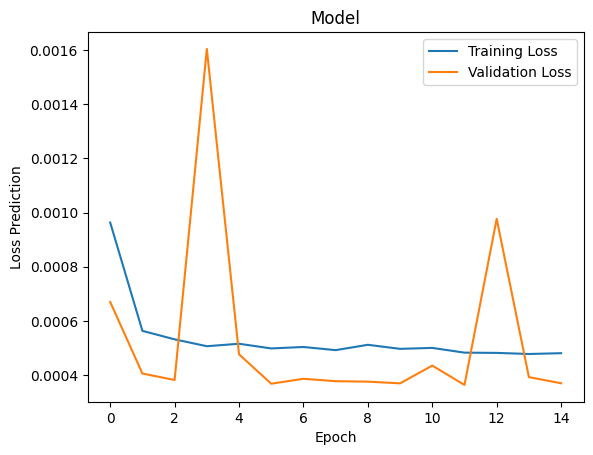

In [ ]:
def stats_reveal (training):
    plt.plot(training.history['loss'])
    plt.plot(training.history['val_loss'])

    plt.title("Model")
    plt.xlabel("Epoch")
    plt.ylabel("Loss Prediction")
    plt.legend(["Training Loss", "Validation Loss"])

    plt.show()
stats_reveal (training)

66/66 [==============================] - 5s 52ms/step
RSME:  0.20397612967353018
MAE: 0.12011099796970541
MAPE: inf


<ipython-input-33-27ba785af1aa>:20: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((prognosis - Y_test) / Y_test)) * 100


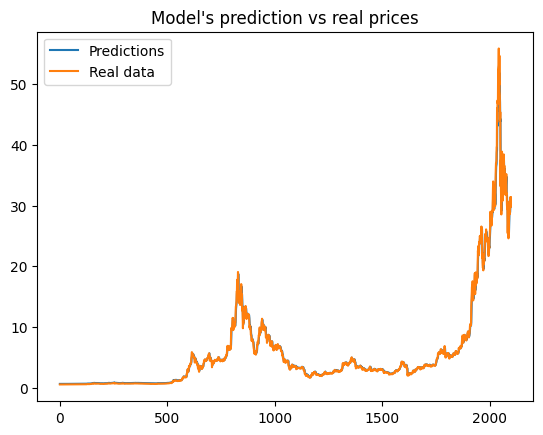

In [ ]:
prognosis = model_lstm.predict(X_test)

plt.title("Model's prediction vs real prices")

rmse = np.sqrt(np.mean(((prognosis - Y_test) ** 2)))
print("RSME: ", rmse)

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(prognosis - Y_test))
print("MAE:", mae)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((prognosis - Y_test) / Y_test)) * 100
print("MAPE:", mape)

#Plots the prediction data.
plt.plot(prognosis*factor_scale[20] + shift_info[20])

#Plots the real data.
plt.plot(Y_test*factor_scale[20] + shift_info[20])

#Outputs the graph and legend.
plt.legend(["Predictions","Real data"])
plt.show()

In [ ]:
# Predicting ahead by 30 timesteps
future_predictions = []

# Initial input for prediction (last sequence in the test data)
current_input = X_test[-1]

for i in range(30):
    # Reshape the input for the model
    current_input = np.reshape(current_input, (1, current_input.shape[0], current_input.shape[1]))
    # Predict the next timestep
    next_prediction = model_lstm.predict(current_input)
    # Append the prediction to the list of future predictions
    future_predictions.append(next_prediction)
    # Update the current input by removing the first timestep and appending the predicted one
    current_input = np.concatenate((current_input[:,1:,:], next_prediction), axis=1)

# Convert future predictions to numpy array
future_predictions = np.array(future_predictions)

# Plotting predictions
plt.title("Model's prediction vs real prices")

# Plotting past predictions and real data
plt.plot(prognosis*factor_scale[20] + shift_info[20])
plt.plot(Y_test*factor_scale[20] + shift_info[20])

# Plotting future predictions
plt.plot(np.arange(len(Y_test), len(Y_test) + 30),
         future_predictions[:, 0, 0]*factor_scale[20] + shift_info[20])

# Updating x-axis
plt.xticks(np.arange(0, len(Y_test) + 30, 20))

# Adding legend
plt.legend(["Predictions", "Real data", "Future predictions"])

# Showing plot
plt.show()


1/1 [==============================] - 0s 36ms/step


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 3 dimension(s) and the array at index 1 has 2 dimension(s)